In [48]:
from bttr.lit_bttr import LitBTTR
from bttr.datamodule import vocab
from PIL import Image, ImageOps
from torchvision.transforms import ToTensor
import torch

In [72]:
ckpt = '../lightning_logs/version_0/checkpoints/epoch=34-step=61879-val_ExpRate=0.6957.ckpt'
img_path = '237.png'
#img_path = '18_em_1.bmp'

In [65]:
model = LitBTTR.load_from_checkpoint(ckpt)

#Repare que esse trecho abaixo tem no notebook do CoMER, mas não no do BTTR. Verifica com calma a diferença de rodar com e sem.
#model = model.eval()
#device = torch.device("cpu")
#model = model.to(device)

In [73]:
img = Image.open(img_path)
img = ImageOps.grayscale(img) #lembra de converter para cinza

#Lembra de também converter para o tamanho que usamos no treinamento: (150,150).

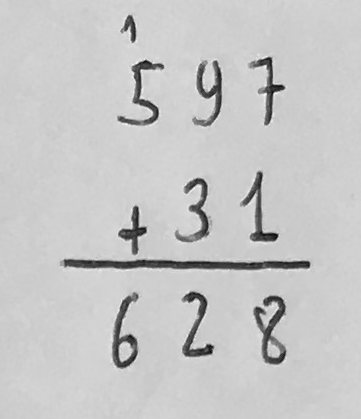

In [74]:
img

In [75]:
img = ToTensor()(img)

In [77]:
#beam_size é um parâmetro que variamos com optuna: pode ser 10 (default) ou 5
beam_size = 10

#max_len e alpha a gente não mexe: usamos esses valores fixos
max_len = 200
alpha = 1.0

mask = torch.zeros_like(img, dtype=torch.bool)#repare aqui que eu troquei para bool (comparei com o do CoMER e com a funcao collate_fn em datamodule.py)
hyps = model.bttr.beam_search(img.unsqueeze(0), mask, beam_size, max_len)
best_hyp = max(hyps, key=lambda h: h.score / (len(h) ** alpha))
hyp = vocab.indices2label(best_hyp.seq)

In [81]:
img.shape

torch.Size([1, 419, 361])

In [35]:
#Isso aqui dá erro. A célula de cima é o ajuste para rodar
hyp = model.beam_search(img)

AssertionError: only bool and floating types of key_padding_mask are supported

In [78]:
print(hyp)

1 7 - 5 1 = 1 6
